In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras import datasets

In [4]:
mnist = datasets.mnist

In [5]:
# train : 학습용, test: 검증용
# x: 이미지,  y: 정답
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [6]:
train_x.shape, train_y.shape, type(train_x[0]), type(train_y[0])

((60000, 28, 28), (60000,), numpy.ndarray, numpy.uint8)

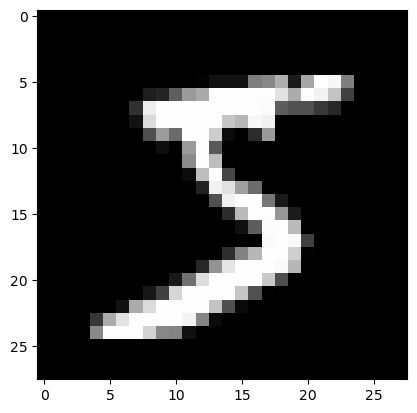

5

In [7]:
train_y
plt.imshow(train_x[0], 'gray')
plt.show()
train_y[0]

In [8]:
# 이미지 데이터 차원 확장 (batch, height, width, channel)
image = train_x[0:8]
image.shape

(8, 28, 28)

In [9]:
#image4 = np.expand_dims(image, -1)  # (8, 28, 28, 1)
image8 = image[..., tf.newaxis]
image8.shape, type(image8)

((8, 28, 28, 1), numpy.ndarray)

In [10]:
img = train_x[0]
img.shape, type(img)

((28, 28), numpy.ndarray)

In [11]:
img_prime = img[tf.newaxis, ..., tf.newaxis]
img_prime.shape

(1, 28, 28, 1)

## Layer construction & feeding images to the layer

In [12]:
# filters:
layer = tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='SAME', activation='relu')
image8.dtype

dtype('uint8')

In [13]:
image8 = tf.cast(image8, dtype=tf.float32)
image8.dtype

tf.float32

In [14]:
output = layer(image8)
output.shape

TensorShape([8, 28, 28, 3])

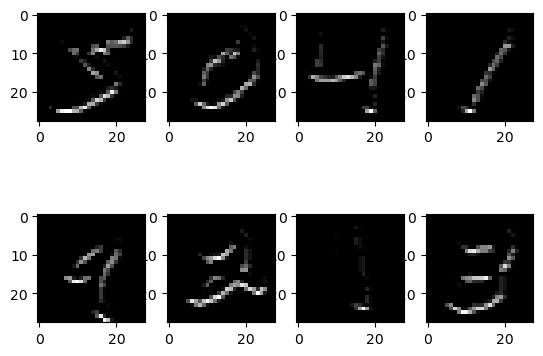

In [15]:
plt.subplot(2,4,1), plt.imshow(output[0,:,:,0],'gray')
plt.subplot(2,4,2), plt.imshow(output[1,:,:,0],'gray')
plt.subplot(2,4,3), plt.imshow(output[2,:,:,0],'gray')
plt.subplot(2,4,4), plt.imshow(output[3,:,:,0],'gray')
plt.subplot(2,4,5), plt.imshow(output[4,:,:,0],'gray')
plt.subplot(2,4,6), plt.imshow(output[5,:,:,0],'gray')
plt.subplot(2,4,7), plt.imshow(output[6,:,:,0],'gray')
plt.subplot(2,4,8), plt.imshow(output[7,:,:,0],'gray')
plt.show()

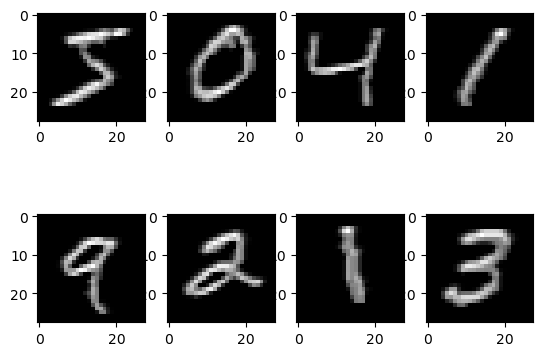

In [16]:
plt.subplot(2,4,1), plt.imshow(output[0,:,:,1],'gray')
plt.subplot(2,4,2), plt.imshow(output[1,:,:,1],'gray')
plt.subplot(2,4,3), plt.imshow(output[2,:,:,1],'gray')
plt.subplot(2,4,4), plt.imshow(output[3,:,:,1],'gray')
plt.subplot(2,4,5), plt.imshow(output[4,:,:,1],'gray')
plt.subplot(2,4,6), plt.imshow(output[5,:,:,1],'gray')
plt.subplot(2,4,7), plt.imshow(output[6,:,:,1],'gray')
plt.subplot(2,4,8), plt.imshow(output[7,:,:,1],'gray')
plt.show()

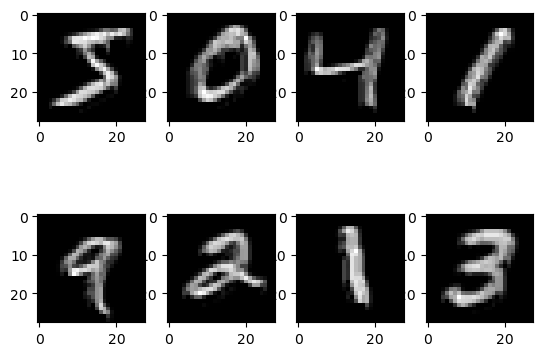

In [17]:
plt.subplot(2,4,1), plt.imshow(output[0,:,:,2],'gray')
plt.subplot(2,4,2), plt.imshow(output[1,:,:,2],'gray')
plt.subplot(2,4,3), plt.imshow(output[2,:,:,2],'gray')
plt.subplot(2,4,4), plt.imshow(output[3,:,:,2],'gray')
plt.subplot(2,4,5), plt.imshow(output[4,:,:,2],'gray')
plt.subplot(2,4,6), plt.imshow(output[5,:,:,2],'gray')
plt.subplot(2,4,7), plt.imshow(output[6,:,:,2],'gray')
plt.subplot(2,4,8), plt.imshow(output[7,:,:,2],'gray')
plt.show()

In [18]:
weight = layer.get_weights()

In [19]:
weight[0].shape, weight[1].shape

((3, 3, 1, 3), (3,))

In [20]:
weight[0][:, :, 0, 0] # 1st filter

array([[ 0.4031818 ,  0.40325272, -0.23805624],
       [-0.37502337, -0.39194   ,  0.28675127],
       [ 0.1308083 , -0.27944478, -0.32159722]], dtype=float32)

In [21]:
weight[0][:, :, 0, 1]

array([[-0.06818712, -0.07599759, -0.22795823],
       [-0.15231901,  0.20292795,  0.03456068],
       [ 0.1405235 ,  0.39295208,  0.24533582]], dtype=float32)

In [22]:
weight[0][:, :, 0, 2], weight[1][2] # index 2번째 필터, 3rd filter

(array([[ 0.14408857, -0.26833168, -0.07497296],
        [ 0.21932411, -0.23708037,  0.20499432],
        [ 0.37941903,  0.40125817,  0.14705616]], dtype=float32),
 0.0)

In [23]:
weight[1]

array([0., 0., 0.], dtype=float32)

(8, 14, 14, 3)
(8, 588)


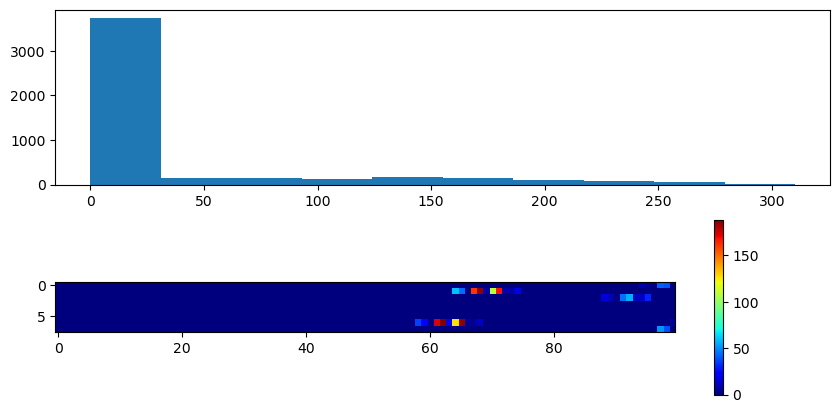

In [24]:


# 활성화 레이어(ReLU) 분리 구현 예시
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

# MaxPooling2D 예시
pool_layer = tf.keras.layers.MaxPool2D()
pool_output = pool_layer(act_output)
print(pool_output.shape)  # (1, 14, 14, 3)

# Flatten 레이어 예시
flatten_layer = tf.keras.layers.Flatten()
flatten = flatten_layer(pool_output)
print(flatten.shape)  # (1, 588)

# Flatten 데이터 시각화
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:, :100], 'jet')
plt.colorbar()
plt.show()


In [25]:
dense_layer1 = tf.keras.layers.Dense(128, activation='relu')
dense_output1 = dense_layer1(flatten)
dense_layer2 = tf.keras.layers.Dense(32, activation = 'relu')
dense_output2 = dense_layer2(dense_output1)
dense_layer3 = tf.keras.layers.Dense(16, activation = 'relu')
dense_output3 = dense_layer3(dense_output2)
dense_output1.shape, dense_output2.shape, dense_output3.shape

(TensorShape([8, 128]), TensorShape([8, 32]), TensorShape([8, 16]))